## Bellman-ford Algorithm & Negetive cycle detection

In [ ]:
# Class definition
import numpy as np
class Graph:
    vertices = []
    graph = np.array([])
    def addVertex(self,v):
        if v not in self.vertices:
            self.vertices.append(v)
    def buildGraph(self):
        n = len(self.vertices)
        self.graph = np.ones((n,n))
        self.graph = self.graph * float('inf')
    def addEdge(self,v1,v2,e):
        self.graph[self.vertices.index(v1),self.vertices.index(v2)] = e
    def bellmanFord(self,start,end):
        n = len(self.vertices)
        startIndex = self.vertices.index(start)
        endIndex = self.vertices.index(end)
        edges = []
        for i in range(n):
            for j in range(n):
                if self.graph[i,j] != float('inf'):
                    edges.append((i,j))
        # Bellman-Ford Algorithm
        res = [float('inf')] * n
        res[startIndex] = 0
        # Actually only n-1 iterations is required, but for checking cycle doing n iterations
        for i in range(n):
            changeHappened = False
            for u,v in edges:
                if (res[u]+self.graph[u,v]) < res[v] :
                    res[v] = res[u]+self.graph[u,v]
                    changeHappened = True
            if changeHappened == False:
                break
        if changeHappened == True:
            print("Negetive cycle exists.")
        else:
            print("Result of Bellman-Ford Algorithm:",res)
            print("Distance from",start,"to",end,":",res[endIndex])

### Sample graph

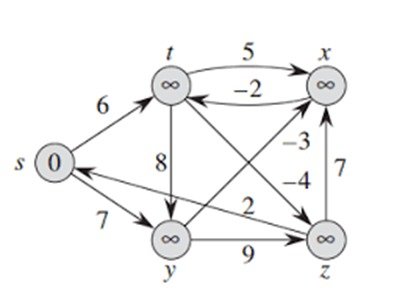

### Initialising graph and adding edges

In [ ]:
# Initialising graph
del g
g = Graph()
g.addVertex("s")
g.addVertex("t")
g.addVertex("x")
g.addVertex("y")
g.addVertex("z")
g.buildGraph()

# Adding edges
g.addEdge("s","t",6)
g.addEdge("s","y",7)
g.addEdge("t","y",8)
g.addEdge("t","x",5)
g.addEdge("t","z",-4)
g.addEdge("x","t",-2)
g.addEdge("y","x",-3)
g.addEdge("y","z",9)
g.addEdge("z","s",2)
g.addEdge("z","x",7)
print("Vertices")
print(g.vertices)
print("\nGraph")
print(g.graph)

Vertices
['s', 't', 'x', 'y', 'z']

Graph
[[inf  6. inf  7. inf]
 [inf inf  5.  8. -4.]
 [inf -2. inf inf inf]
 [inf inf -3. inf  9.]
 [ 2. inf  7. inf inf]]


### Result of Bellman-Ford Algorithm

In [ ]:
g.bellmanFord('s','z')

Result of Bellman-Ford Algorithm: [0, 2.0, 4.0, 7.0, -2.0]
Distance from s to z : -2.0
